In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

In [2]:
game_csv = pd.read_csv('./data/Training_dataset_Original.csv',na_values=["NA", "na", "missing"])
gameDf = pd.DataFrame(game_csv)

dataDict = pd.read_csv('./data/Data_Dictionary.csv',na_values="NA")

#Leaderboard
leader_csv = pd.read_csv('./data/Leaderboard_dataset.csv',na_values=["NA", "na", "missing"])
leaderDf = pd.DataFrame(leader_csv)

#Evaluation
eval_csv = pd.read_csv('./data/Evaluation_dataset.csv',na_values=["NA", "na", "missing"])
evalDf = pd.DataFrame(eval_csv)


In [3]:
print(gameDf.shape)
print(dataDict.shape)
print(evalDf.shape)

(80000, 49)
(49, 2)
(25000, 48)


In [4]:
dic = dict(zip(dataDict.values[:, 1], dataDict.values[:, 0]))

In [5]:
dic['Average tenure of active revolving credit cards (in days)']

'mvar25'

In [6]:
#remove ID column
del gameDf[dic['Application ID (primary key)']]
del dic['Application ID (primary key)']

leaderAppID = leaderDf['application_key']
del leaderDf['application_key']
leaderX = leaderDf.copy()

evalAppID = evalDf['application_key']
del evalDf['application_key']
evalX = evalDf.copy()

In [7]:
gameX = gameDf.iloc[:,:-1]
gameY = gameDf.iloc[:,-1]

In [8]:
range(gameDf["mvar47"].shape[0])

range(0, 80000)

In [9]:
gameX["mvar47"][0]

'C'

In [10]:
#one hot encoding C=0 L=1
gameX['mvar47'] = pd.get_dummies(gameX['mvar47'])
leaderX['mvar47'] = pd.get_dummies(leaderX['mvar47'])
evalX['mvar47'] = pd.get_dummies(evalX['mvar47'])

In [11]:
gameX["mvar47"].dtype

dtype('uint8')

In [12]:
#Missing values median
gameX.fillna(gameX.mean(),inplace = True)
leaderX.fillna(gameX.mean(),inplace = True)
evalX.fillna(gameX.mean(),inplace = True)

,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,...,mvar38,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47
0,1860.000000,0.466800,0.212000,0.000000,0.00000,1621.000000,151211.000000,22298.00000,161588.000000,207987.000000,...,0.000000,0.000000,98.497452,72.096758,0.000000,10.000000,0.955970,0.000000,0.096135,1
1,1797.000000,1.105629,0.000000,0.000000,0.00000,920.000000,8124.000000,920.00000,30429.000000,14070.000000,...,1.000000,0.000000,98.497452,14.888000,0.000000,4.000000,0.452500,0.070736,0.000000,1
2,1826.000000,0.042300,0.000000,0.000000,0.00000,3478.000000,7209.000000,3964.00000,16054.000000,24924.000000,...,2.000000,0.000000,37.586000,64.002000,0.090910,7.000000,0.923840,0.000000,0.000000,1
3,1656.000000,0.272600,41.623000,0.000000,0.00000,4955.000000,4955.000000,4955.00000,65010.000000,0.000000,...,0.000000,0.000000,98.497452,72.096758,0.526320,0.000000,0.705285,0.070736,0.000000,0
4,1915.000000,1.105629,0.000000,0.000000,0.00000,6918.000000,7433.000000,6918.00000,7433.000000,14351.000000,...,0.000000,0.000000,98.497452,72.096758,0.000000,2.000000,1.000000,0.070736,0.096135,0
5,1789.000000,1.105629,0.000000,0.000000,0.00000,1606.702372,0.000000,6773.68666,34097.436013,0.000000,...,3.000000,0.000000,100.000000,72.096758,0.000000,3.000000,0.533330,0.070736,0.096135,0
6,1793.000000,0.000000,0.000000,0.000000,0.00000,427.000000,7794.000000,7794.00000,84830.000000,14925.000000,...,0.000000,0.000000,98.497452,72.096758,0.000000,9.000000,0.929810,0.000000,0.000000,0
7,1755.000000,4.700100,0.000000,0.000000,0.00000,0.000000,16847.000000,16847.00000,44975.000000,31911.000000,...,5.000000,0.000000,98.497452,72.096758,0.000000,8.000000,0.547120,0.070736,0.096135,0
8,1799.000000,0.066800,0.000000,0.000000,0.00000,899.000000,899.000000,899.00000,4162.000000,899.000000,...,0.000000,0.000000,98.497452,72.096758,0.000000,6.000000,1.000000,0.070736,0.096135,1
9,1911.000000,0.459900,0.000000,0.000000,0.00000,1015.000000,16051.000000,11892.00000,26408.000000,57627.000000,...,4.000000,0.000000,98.497452,72.096758,0.000000,8.000000,0.516870,0.000000,0.000000,1


In [13]:
#BREAK OPEN

In [14]:
#xtrain1 - training set - val set
#xtrain2 - whole training set

In [15]:
xtrain2 = gameX
ytrain2 = gameY

In [16]:
#train test split
from sklearn import model_selection
xtrain1, xtest, ytrain1, ytest = model_selection.train_test_split(gameX,gameY, test_size=0.25, stratify = gameY, random_state=1)

In [17]:
xtrain = xtrain1
ytrain = ytrain1


In [18]:
#preprocessing
from sklearn import preprocessing
from sklearn import pipeline
scaler = preprocessing.StandardScaler().fit(xtrain)
x_train_scaled = scaler.transform(xtrain)
x_test_scaled = scaler.transform(xtest)

leaderX_scaled = scaler.transform(leaderX)
evalX_scaled = scaler.transform(evalX)


In [19]:
#Make sure to change gameX to xtrain and leaderX to xtest

# Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
import time

ranMax=RandomForestClassifier(max_features=5,n_estimators=100,random_state=1).fit(xtrain, ytrain)

In [21]:
pred1 = ranMax.predict_proba(xtest)

# XGB Method 3

In [22]:
#current

In [23]:
import xgboost as xgb
import time


dtrain = xgb.DMatrix(xtrain, ytrain)
num_round = 1000
early_stopping_rounds = 50
n_fold = 5
watchlist = [(dtrain, 'eval'), (dtrain, 'train')]

print('running cross validation')

print('running cross validation, with preprocessing function')
# define the preprocessing function
# used to return the preprocessed training, test data, and parameter
# we can use this to do weight rescale, etc.
# as a example, we try to set scale_pos_weight
def fpreproc(dtrain, dtest, param):
    label = dtrain.get_label()
    ratio = float(np.sum(label == 0)) / np.sum(label == 1)
    param['scale_pos_weight'] = ratio
    return (dtrain, dtest, param)

# do cross validation, for each fold
# the dtrain, dtest, param will be passed into fpreproc
# then the return value of fpreproc will be used to generate
# results of that fold

###
# you can also do cross validation with customized loss function
# See custom_objective.py
##
print('running cross validation, with cutomsized loss function')
#Custom
wt = 0.5
def logregobj(preds, dtrain):
    labels = dtrain.get_label()
    preds = 1.0 / (1.0 + np.exp(-preds))
    grad = wt*(1.0-labels)*preds - (1-wt)*labels*(1-preds)
    hess = preds * (1.0 - preds) * (wt*(1.0-labels)+(1.0-wt)*labels)
    return grad, hess

# def logregobj(preds, dtrain):
#     labels = dtrain.get_label()
#     preds = 1.0 / (1.0 + np.exp(-preds))
#     grad = preds - labels
#     hess = preds * (1.0 - preds)
#     return grad, hess
def evalerror(preds, dtrain):
    labels = dtrain.get_label()
    return 'error', float(sum(labels != (preds > 0.0))) / len(labels)

param = {
#     'max_depth': 3,#3 
    'eta': 0.1, #0.1
    'silent': 1, 
    'gamma': 0, 
    'max_depth': 4, #4
    'min_child_weight': 1, #1
    'subsample': 0.8, #0.8
    'colsample_bytree': 0.8, #0,8
    'reg_lambda': 1, #L2 reg default:1
    'reg_alpha': 0.05, #L1 reg default:0
    'scale_pos_weight': 1, 
#     'missing': -999
#     'objective': 'binary:logistic', #for custom loss define it in xgb.train(obj=custom_loss)
#     'eval_metric': 'error'
}

t = time.time()
# CV to find optimum number of boosted trees (num_round)
# cvresult = xgb.cv(
#             param, #param set by user
#             dtrain, #train set
#             num_round, #max number of boosted tree, >early_stopping_round
#             nfold=n_fold, #n fold CV
#             seed=0, 
#             obj=logregobj, #custom loss func
#             feval=evalerror, #custom eval metric
#             callbacks=[xgb.callback.print_evaluation(show_stdv=False),
#                        xgb.callback.early_stop(early_stopping_rounds)], #decides optimum number of boosted trees, <num_round
# #             fpreproc=fpreproc, #function for preprocessing
#             )

# num_round = cvresult.shape[0] #optimum number of boosted trees
num_round = 231
bst = xgb.train(param, dtrain, num_round, obj=logregobj, feval=evalerror)

print("time taken:", time.time()-t)

/home/ekka/.local/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


running cross validation
running cross validation, with preprocessing function
running cross validation, with cutomsized loss function
time taken: 22.46067237854004


In [24]:
dtest = xgb.DMatrix(xtest)
pred2 = 1/(1+np.exp(-bst.predict(dtest)))

# Linear SVM

In [25]:
from sklearn.svm import LinearSVC
svm = LinearSVC()
svm.fit(x_train_scaled,ytrain)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [26]:
pred = svm.decision_function(x_test_scaled)
pred3 = (pred - pred.min()) / (pred.max() - pred.min())  #gives probab of 1!

# pred3 = 1-pred3

In [27]:
pred3

array([ 0.57924874,  0.45090152,  0.60952183, ...,  0.63789132,
        0.46720311,  0.59475425])

In [28]:
leaderX_scaled.shape

(25000, 47)

In [29]:
x_test_scaled.shape

(20000, 47)

# MLP

In [30]:
from sklearn.neural_network import MLPClassifier
nclf = MLPClassifier(hidden_layer_sizes = (30,18,14,5),alpha = 0.1,solver = 'adam')
nclf.fit(x_train_scaled,ytrain)

MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 18, 14, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [31]:
pred4 = nclf.predict_proba(x_test_scaled)

# Ensemble

In [32]:
#train ensemble (ONCE only ie: using xtrain1)

In [33]:
lr_data = pd.DataFrame({'0':pred1[:, 1],  '1': pred2, '2':pred3, '3':pred4[:, 1], 'y': ytest })

In [34]:
lr_dataX = lr_data.iloc[:, :-1]
lr_dataY = lr_data.iloc[:, -1]

In [35]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=1, solver='lbfgs', multi_class='multinomial').fit(lr_dataX, lr_dataY)

In [36]:
#predict leader from ensemble

In [38]:
leader_pred1 = ranMax.predict_proba(leaderX)

dtest = xgb.DMatrix(leaderX)
leader_pred2 = 1/(1+np.exp(-bst.predict(dtest)))

pred3 = svm.decision_function(leaderX_scaled)
leader_pred3 = (pred3 - pred3.min()) / (pred3.max() - pred3.min())  #gives probab of 1!

leader_pred4 = nclf.predict_proba(leaderX_scaled)

lr_leader_data = pd.DataFrame({'0':leader_pred1[:, 1],  '1': leader_pred2, '2': leader_pred3, '3': leader_pred4[:, 1] })

leader_ensemble = clf.predict_proba(lr_leader_data)

In [39]:
pred = leader_ensemble

In [ ]:
#predict leader from ensemble

In [51]:
eval_pred1 = ranMax.predict_proba(evalX)

dtest = xgb.DMatrix(evalX)
eval_pred2 = 1/(1+np.exp(-bst.predict(dtest)))

pred3 = svm.decision_function(evalX_scaled)
eval_pred3 = (pred3 - pred3.min()) / (pred3.max() - pred3.min())  #gives probab of 1!

eval_pred4 = nclf.predict_proba(evalX_scaled)

lr_eval_data = pd.DataFrame({'0':eval_pred1[:, 1],  '1': eval_pred2, '2': eval_pred3, '3': eval_pred4[:, 1] })

eval_ensemble = clf.predict_proba(lr_eval_data)

In [52]:
pred = eval_ensemble

In [53]:
#USE EVALAPPID !!

In [54]:
pred = pd.DataFrame(pred)
# pred['application_key'] = leaderAppID
pred['application_key'] = evalAppID
pred.shape

(25000, 3)

In [55]:
pred

,0,1,application_key
0,0.716659,0.283341,570075
1,0.686331,0.313669,570076
2,0.704834,0.295166,570077
3,0.703845,0.296155,570078
4,0.742254,0.257746,570079
5,0.662149,0.337851,570080
6,0.732955,0.267045,570081
7,0.581647,0.418353,570082
8,0.691780,0.308220,570083
9,0.698202,0.301798,570084


In [56]:
pred = pred.sort_values(by = 0,kind = 'mergesort',ascending = False) #true for xgb method3

In [57]:
cols = pred.columns.tolist()
cols = cols[-1:] + cols[:-1]
pred = pred[cols]

In [58]:
pred = pred.loc[:,'application_key':]

In [59]:
submit = pred['application_key'][:10000]
submit = pd.DataFrame(submit)
submit[0] = 0

In [60]:
submit

,application_key,0
23360,593435,0
16470,586545,0
14997,585072,0
574,570649,0
21538,591613,0
7344,577419,0
9865,579940,0
12654,582729,0
24527,594602,0
8684,578759,0


In [61]:
submit.to_csv('flabbergasted_IITGuwahati.csv',header = False, index = False)

In [62]:
clf.coef_

array([[ 1.01097291,  1.04328868,  2.74553512,  0.17513312]])

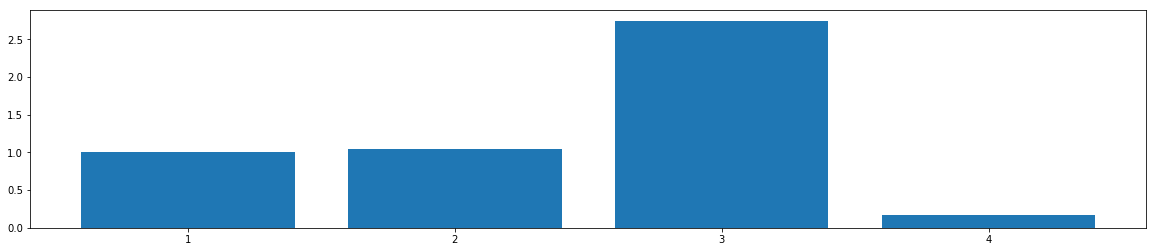

In [63]:
#LR feature imp
lr_coef = clf.coef_.reshape(-1, 1)
plt.figure(figsize=(20, 4))
plt.bar(range(1, len(lr_coef)+1), np.abs(lr_coef) )
plt.xticks(range(1, len(lr_coef)+1))
plt.show()